In [1]:
import numpy as np

import proper
proper.use_ffti = False
proper.use_fftw = False
import roman_phasec_proper
roman_phasec_proper.copy_here()
import ray # for multiprocesing
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
reload(cgi)

import misc_funs as misc

npix = 310

iwa = 6
owa = 20

dm1_flat = fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm1.fits')
dm2_flat = fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm2.fits')

# dm1_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits')
# dm2_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits')

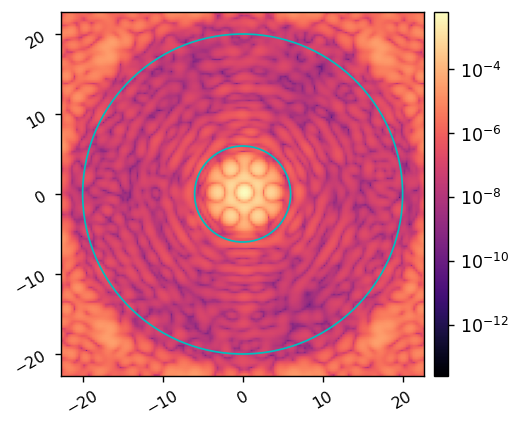

In [2]:
reload(cgi)
reload(cgi.proper_cgi)
mode = cgi.PROPERCGI(cgi_mode='spc-wide', npsf=150,
                     use_pupil_defocus=True, 
                     use_opds=True,
                     dm1_ref=2*dm1_flat,
                     polaxis=0)
mode.use_fpm = False
psf = mode.snap()
mode.Imax_ref = np.max(psf)
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(psf, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)



In [7]:

misc.save_fits('proper_spc_wide_flattened_psf.fits', ref_psf)

Saved data to:  proper_spc_wide_flattened_psf.fits


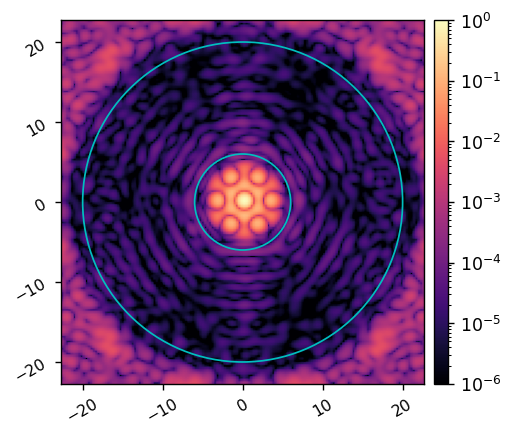

In [3]:
mode.norm = np.max(psf)
ref_psf = mode.snap()
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(ref_psf, lognorm=True, vmin=1e-6, pxscl=mode.psf_pixelscale_lamD, patches=patches)


In [11]:
misc.save_fits('proper_spc_wfov_825_aberrated_psf.fits', ref_im)

Saved data to:  proper_spc_wfov_825_aberrated_psf.fits


In [6]:
misc.save_fits('proper_spc_wide_flattened_image.fits', ref_im)

Saved data to:  proper_spc_wide_flattened_image.fits


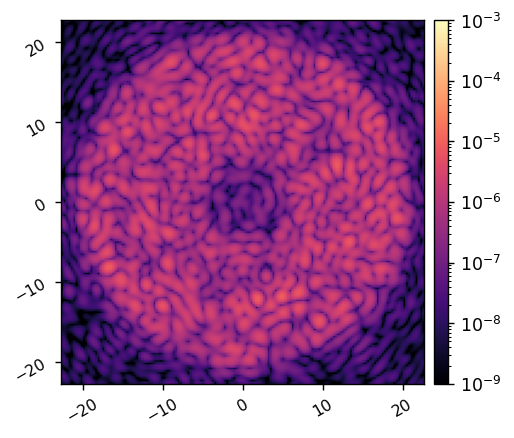

In [5]:
mode.use_fpm = True
ref_im = mode.snap()
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(ref_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmax=1e-3, vmin=1e-9)

In [9]:
misc.save_fits('proper_spc_wide_flattened_image_bad.fits', ref_im_bad)

Saved data to:  proper_spc_wide_flattened_image_bad.fits


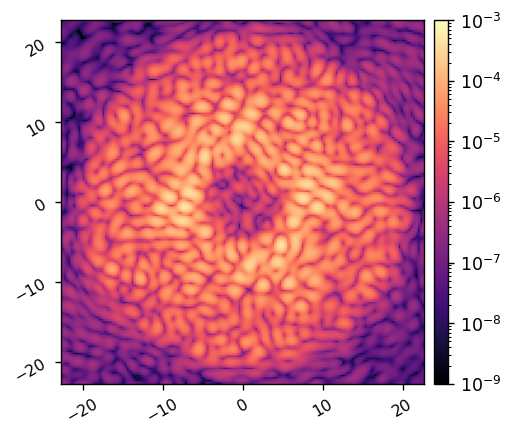

In [8]:
mode.use_fpm = True
mode.set_dm1(np.zeros_like(dm1_flat))
ref_im_bad = mode.snap()
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(ref_im_bad, lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmax=1e-3, vmin=1e-9)

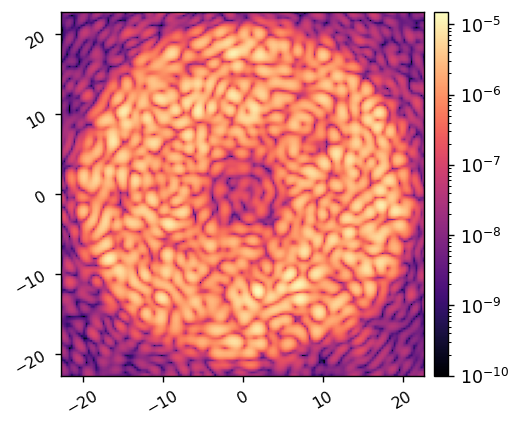

In [5]:
mode.set_dm1(dm1_flat)
mode.set_dm2(dm2_flat)

image = mode.snap()
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmin=1e-10)

In [13]:
misc.save_fits('proper_spc_wfov_825_aberrated.fits', image)

Saved data to:  proper_spc_wfov_825_aberrated.fits


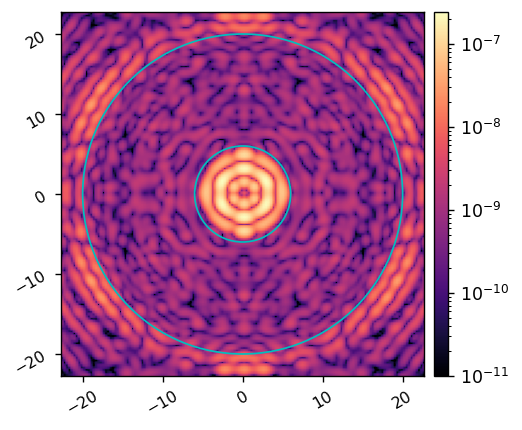

In [7]:
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmin=1e-11, patches=patches)

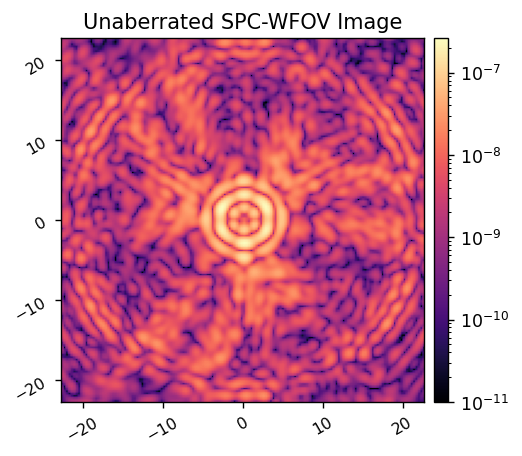

In [3]:
misc.imshow1(image, 'Unaberrated SPC-WFOV Image', lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmin=1e-11)


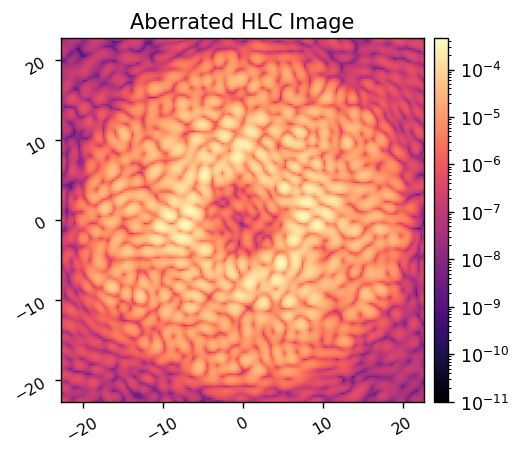

In [4]:
mode.use_opds = True
mode.polaxis = 10
ab_image = mode.snap()
misc.imshow1(ab_image, 'Aberrated SPC Image', lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmin=1e-11)
